In [ ]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

train_data = MNIST(root='./', train=True, transform=ToTensor(), download=True)
test_data = MNIST(root='./', train=False, transform=ToTensor(), download=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.26MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 152kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.46MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.30MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
labels = train_data.classes
print(labels)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


In [ ]:
img, label = train_data[1]

In [ ]:
img, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
img.shape

torch.Size([1, 28, 28])

In [ ]:
img.permute(1, 2, 0).shape

torch.Size([28, 28, 1])

Text(0.5, 1.0, '0 - zero')

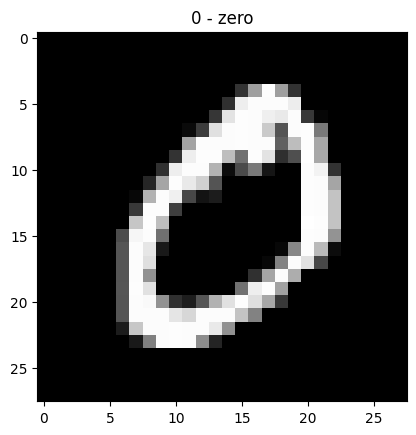

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img.permute(1, 2, 0), cmap='gray')
plt.title(f'{labels[label]}')

In [ ]:
from torch.utils.data import DataLoader

batch_size = 32

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [ ]:
from torch import nn

input_size = 1
output_size = 10

Model = nn.Sequential(
  nn.Flatten(),
  nn.Linear(in_features=input_size * 28 * 28, out_features=output_size),
  nn.ReLU())

In [ ]:
model = Model

In [ ]:
import torch

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(
    params=model.parameters(),
    lr=0.01
)

In [ ]:
from tqdm.auto import tqdm

epochs = 10

for epoch in tqdm(range(epochs)):
  model.train()

  for X_train, y_train in train_dataloader:
    y_pred = model(X_train)

    train_loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

  model.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model(X_test)

      test_loss = loss_fn(test_pred, y_test)

  print(f'Epoch: {epoch} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}')

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train Loss: 0.7063 | Test Loss: 0.6601
Epoch: 1 | Train Loss: 0.7482 | Test Loss: 0.5929
Epoch: 2 | Train Loss: 0.4000 | Test Loss: 0.5711
Epoch: 3 | Train Loss: 0.9011 | Test Loss: 0.5471
Epoch: 4 | Train Loss: 0.7355 | Test Loss: 0.5195
Epoch: 5 | Train Loss: 0.4305 | Test Loss: 0.5089
Epoch: 6 | Train Loss: 0.4919 | Test Loss: 0.5076
Epoch: 7 | Train Loss: 0.2727 | Test Loss: 0.4956
Epoch: 8 | Train Loss: 0.8007 | Test Loss: 0.4971
Epoch: 9 | Train Loss: 0.5077 | Test Loss: 0.4838


In [ ]:
# Zadanie wytrenuj model na 10 epokach i pobaw się innymi wartościami takimi jak learning rate

In [ ]:
torch.save(model.state_dict(), "model.pth")

In [ ]:
!pip install gradio --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.9/321.9 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.1/464.1 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 91.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.27.1
    Uninstalling huggingface-hub-0.27.1:
      Successfully uninstalled huggingface-hub-0.27.1


In [ ]:
import torch
import gradio as gr
import torchvision.transforms as transforms

from PIL import Image, ImageOps

loaded_model = Model

state_dict = torch.load('model.pth')
loaded_model.load_state_dict(state_dict)

loaded_model.eval()

transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

def predict_digit(img):
    img = ImageOps.invert(img.convert("L"))
    img = transform(img).unsqueeze(0)
    with torch.inference_mode():
        output = model(img)
        prediction = torch.argmax(output, dim=1).item()
    return str(prediction)

iface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(type="pil"),
    outputs="label",
    live=False
)

iface.launch(share=True, debug=True)

<ipython-input-19-efa9090a1ee0>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load('model.pth')


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://4140649f052527cac0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
